# Run the whole deltas algorithm

In [363]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas
import models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [364]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-5, -5],
    m2=[10, 10],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 50]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

fitting to : (10010, 2)
linear (1, 2)


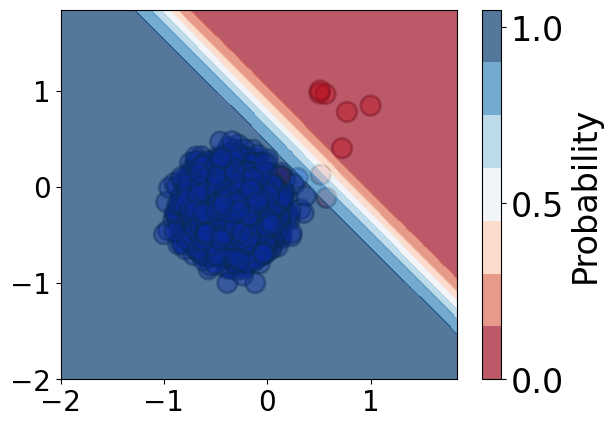

In [365]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [366]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[1.413065]])

## Fit deltas

fitting to : (10010, 1)
rbf (1, 57)


ValueError: XA must be a 2-dimensional array.

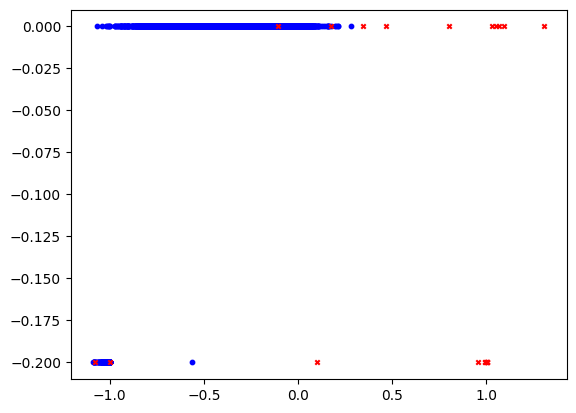

In [367]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.reprojection_deltas(
    clf,
    projection_model=model_deltas.reprojectioner(projecter=models.SVM(kernel='rbf'))
    ).fit(X, y, _print=True, _plot=True)

## Plot training data information

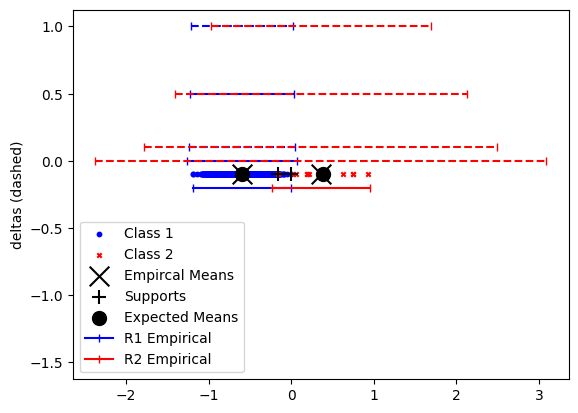

In [ ]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [ ]:
deltas_model.print_params()

Parameters
                R:  1.1921407076761301
                N1: 10000
                N2: 10
                R1: 0.5958395004957903
                R2: 0.5747259914873643
                M:  0.149502576784151
                D:  0.9556990195878305
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.79465
deltas   accuracy: 0.89575
original F1: 0.7415843453092557
deltas   F1: 0.9051539826229359
original precision: 1.0
deltas   precision: 0.8302595343403154


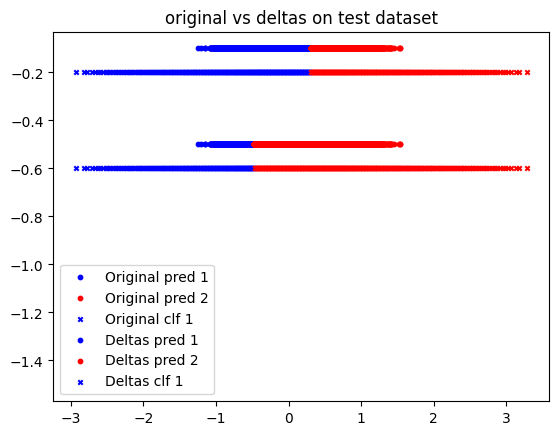

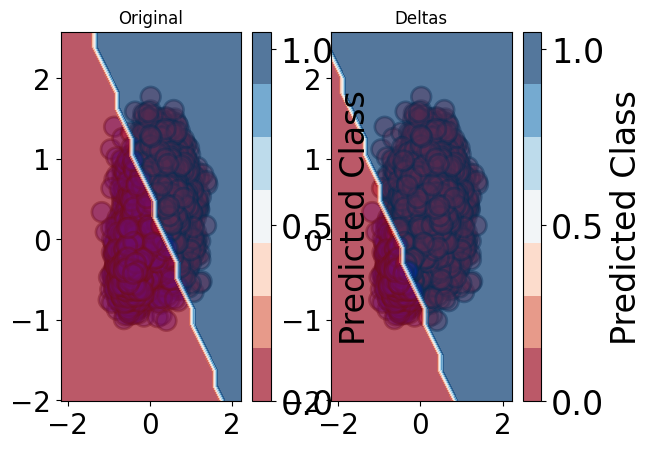

In [ ]:
pipeline.eval_test_new(clf, deltas_model,
                       data_clf['data_test'], _print=True, _plot=True)